In [1]:
import numpy as np
import math
import arms
import policy
import matplotlib.pyplot as plt
from time import time

In [20]:
# build a MAB with arms that are not only Bernoulli
random_state = np.random.randint(1, 312414)

arm1 = arms.ArmBernoulli(0.30, random_state=random_state)
arm2 = arms.ArmBeta(2, 5, random_state=random_state)
arm3 = arms.ArmExp(1, random_state=random_state)
arm4 = arms.ArmBeta(1, 1, random_state=random_state)

MAB1 = [arm1, arm2, arm3, arm4]

nb_arms = len(MAB1)
means = [arm.mean for arm in MAB1]
mu_max = np.max(means)
print(means)

[0.3, 0.2857142857142857, 0.41802329313067355, 0.5]


In [21]:
def TS_adaptation(T, MAB, print_info=False):
    # init:
    nb_arms = len(MAB)
    N = np.zeros(nb_arms).astype(int)
    S = np.zeros(nb_arms)
    rew = np.zeros(T)
    draws = np.zeros(T).astype(int)
    
    for t in range(T):
        mu = np.random.beta(S+1, N-S+1)
        a_next = np.argmax(mu)
        r = MAB[a_next].sample()[0]
        r = np.random.binomial(1,r)
        draws[t] = a_next
        rew[t] = r
        N[a_next] += 1
        S[a_next] += r
        if print_info:
            print("t = {}".format(t))
            print("Next Arm to draw: {}".format(a_next + 1))
            print("Reward of the next arm drawn: {}".format(r))
            print("N updated: {}".format(N))
            print("S updated: {}".format(S))
            print("\n")
    return rew,draws

t = 0
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [0 0 0 1]
S updated: [ 0.  0.  0.  0.]


t = 1
Next Arm to draw: 2
Reward of the next arm drawn: 0
N updated: [0 1 0 1]
S updated: [ 0.  0.  0.  0.]


t = 2
Next Arm to draw: 1
Reward of the next arm drawn: 0
N updated: [1 1 0 1]
S updated: [ 0.  0.  0.  0.]


t = 3
Next Arm to draw: 1
Reward of the next arm drawn: 0
N updated: [2 1 0 1]
S updated: [ 0.  0.  0.  0.]


t = 4
Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [2 1 1 1]
S updated: [ 0.  0.  1.  0.]


t = 5
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [2 1 2 1]
S updated: [ 0.  0.  1.  0.]


t = 6
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [2 1 3 1]
S updated: [ 0.  0.  1.  0.]


t = 7
Next Arm to draw: 2
Reward of the next arm drawn: 0
N updated: [2 2 3 1]
S updated: [ 0.  0.  1.  0.]


t = 8
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [2 2 4 1]
S updated: [ 0.  0.  1.  0.]


t = 9
Next

Reward of the next arm drawn: 0
N updated: [ 7 17 22 53]
S updated: [  1.   5.  10.  23.]


t = 99
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 7 17 22 54]
S updated: [  1.   5.  10.  23.]


t = 100
Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [ 7 17 23 54]
S updated: [  1.   5.  11.  23.]


t = 101
Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [ 7 17 24 54]
S updated: [  1.   5.  12.  23.]


t = 102
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 7 17 24 55]
S updated: [  1.   5.  12.  23.]


t = 103
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 7 17 24 56]
S updated: [  1.   5.  12.  23.]


t = 104
Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [ 7 17 25 56]
S updated: [  1.   5.  13.  23.]


t = 105
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [ 7 17 26 56]
S updated: [  1.   5.  13.  23.]


t = 106
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated

Reward of the next arm drawn: 1
N updated: [ 25  32 191  94]
S updated: [  5.   9.  81.  36.]


t = 342
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [ 25  32 192  94]
S updated: [  5.   9.  81.  36.]


t = 343
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 25  32 192  95]
S updated: [  5.   9.  81.  37.]


t = 344
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [ 25  32 193  95]
S updated: [  5.   9.  81.  37.]


t = 345
Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [ 25  32 194  95]
S updated: [  5.   9.  82.  37.]


t = 346
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 25  32 194  96]
S updated: [  5.   9.  82.  38.]


t = 347
Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [ 25  32 195  96]
S updated: [  5.   9.  82.  38.]


t = 348
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 25  32 195  97]
S updated: [  5.   9.  82.  39.]


t = 349
Next Arm to draw: 4
Reward o

S updated: [   7.    9.  109.   94.]


t = 571
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  35 281 226]
S updated: [   7.    9.  109.   94.]


t = 572
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  35 281 227]
S updated: [   7.    9.  109.   95.]


t = 573
Next Arm to draw: 2
Reward of the next arm drawn: 0
N updated: [ 30  36 281 227]
S updated: [   7.    9.  109.   95.]


t = 574
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  36 281 228]
S updated: [   7.    9.  109.   95.]


t = 575
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  36 281 229]
S updated: [   7.    9.  109.   96.]


t = 576
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  36 281 230]
S updated: [   7.    9.  109.   97.]


t = 577
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  36 281 231]
S updated: [   7.    9.  109.   97.]


t = 578
Next Arm to draw: 4
Reward of the next arm drawn: 1
N upd

Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 479]
S updated: [   7.   12.  119.  221.]


t = 846
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 480]
S updated: [   7.   12.  119.  222.]


t = 847
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 481]
S updated: [   7.   12.  119.  223.]


t = 848
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 482]
S updated: [   7.   12.  119.  224.]


t = 849
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 483]
S updated: [   7.   12.  119.  225.]


t = 850
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  39 298 484]
S updated: [   7.   12.  119.  225.]


t = 851
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  39 298 485]
S updated: [   7.   12.  119.  226.]


t = 852
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  39 298 486]
S updated: [   7.   12.

Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 663]
S updated: [   7.   12.  119.  315.]


t = 1033
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 664]
S updated: [   7.   12.  119.  315.]


t = 1034
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 665]
S updated: [   7.   12.  119.  315.]


t = 1035
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 666]
S updated: [   7.   12.  119.  315.]


t = 1036
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 667]
S updated: [   7.   12.  119.  315.]


t = 1037
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 668]
S updated: [   7.   12.  119.  315.]


t = 1038
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  41 299 669]
S updated: [   7.   12.  119.  315.]


t = 1039
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  41 299 670]
S updated: [   7

N updated: [ 30  42 300 882]
S updated: [   7.   12.  119.  428.]


t = 1254
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  42 300 883]
S updated: [   7.   12.  119.  428.]


t = 1255
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  42 300 884]
S updated: [   7.   12.  119.  429.]


t = 1256
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  42 300 885]
S updated: [   7.   12.  119.  429.]


t = 1257
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  42 300 886]
S updated: [   7.   12.  119.  430.]


t = 1258
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  42 300 887]
S updated: [   7.   12.  119.  430.]


t = 1259
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [ 30  42 300 888]
S updated: [   7.   12.  119.  431.]


t = 1260
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [ 30  42 300 889]
S updated: [   7.   12.  119.  431.]


t = 1261
Next Arm to draw: 4


Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1090]
S updated: [   7.   13.  119.  530.]


t = 1464
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1091]
S updated: [   7.   13.  119.  530.]


t = 1465
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  30   44  300 1092]
S updated: [   7.   13.  119.  531.]


t = 1466
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1093]
S updated: [   7.   13.  119.  531.]


t = 1467
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1094]
S updated: [   7.   13.  119.  531.]


t = 1468
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1095]
S updated: [   7.   13.  119.  531.]


t = 1469
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  30   44  300 1096]
S updated: [   7.   13.  119.  531.]


t = 1470
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  30 

S updated: [   7.   13.  119.  666.]


t = 1720
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  31   45  301 1344]
S updated: [   7.   13.  119.  666.]


t = 1721
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  31   45  301 1345]
S updated: [   7.   13.  119.  666.]


t = 1722
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  31   45  301 1346]
S updated: [   7.   13.  119.  666.]


t = 1723
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  31   45  301 1347]
S updated: [   7.   13.  119.  666.]


t = 1724
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  31   45  301 1348]
S updated: [   7.   13.  119.  666.]


t = 1725
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  31   45  301 1349]
S updated: [   7.   13.  119.  667.]


t = 1726
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  31   45  301 1350]
S updated: [   7.   13.  119.  668.]


t = 1727
Next Arm to draw: 4
R

t = 1977
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1600]
S updated: [   8.   13.  119.  799.]


t = 1978
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1601]
S updated: [   8.   13.  119.  800.]


t = 1979
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1602]
S updated: [   8.   13.  119.  800.]


t = 1980
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1603]
S updated: [   8.   13.  119.  800.]


t = 1981
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1604]
S updated: [   8.   13.  119.  800.]


t = 1982
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1605]
S updated: [   8.   13.  119.  800.]


t = 1983
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1606]
S updated: [   8.   13.  119.  800.]


t = 1984
Next Arm to draw: 4
Reward of the next arm drawn: 0
N update

t = 2242
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1865]
S updated: [   8.   13.  119.  921.]


t = 2243
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1866]
S updated: [   8.   13.  119.  922.]


t = 2244
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1867]
S updated: [   8.   13.  119.  923.]


t = 2245
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1868]
S updated: [   8.   13.  119.  923.]


t = 2246
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1869]
S updated: [   8.   13.  119.  924.]


t = 2247
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 1870]
S updated: [   8.   13.  119.  924.]


t = 2248
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 1871]
S updated: [   8.   13.  119.  925.]


t = 2249
Next Arm to draw: 4
Reward of the next arm drawn: 1
N update

t = 2470
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 2093]
S updated: [    8.    13.   119.  1020.]


t = 2471
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 2094]
S updated: [    8.    13.   119.  1020.]


t = 2472
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   45  301 2095]
S updated: [    8.    13.   119.  1020.]


t = 2473
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 2096]
S updated: [    8.    13.   119.  1021.]


t = 2474
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 2097]
S updated: [    8.    13.   119.  1022.]


t = 2475
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 2098]
S updated: [    8.    13.   119.  1023.]


t = 2476
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   45  301 2099]
S updated: [    8.    13.   119.  1024.]


t = 2477
Next Arm to draw: 4
Reward of th

S updated: [    8.    14.   120.  1146.]


t = 2720
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   46  302 2341]
S updated: [    8.    14.   120.  1146.]


t = 2721
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   46  302 2342]
S updated: [    8.    14.   120.  1147.]


t = 2722
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   46  302 2343]
S updated: [    8.    14.   120.  1148.]


t = 2723
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   46  302 2344]
S updated: [    8.    14.   120.  1148.]


t = 2724
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   46  302 2345]
S updated: [    8.    14.   120.  1148.]


t = 2725
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   46  302 2346]
S updated: [    8.    14.   120.  1148.]


t = 2726
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   46  302 2347]
S updated: [    8.    14.   120.  1148.]


Reward of the next arm drawn: 0
N updated: [  32   49  302 2589]
S updated: [    8.    15.   120.  1270.]


t = 2972
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   49  302 2590]
S updated: [    8.    15.   120.  1271.]


t = 2973
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   49  302 2591]
S updated: [    8.    15.   120.  1271.]


t = 2974
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   49  302 2592]
S updated: [    8.    15.   120.  1272.]


t = 2975
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   49  302 2593]
S updated: [    8.    15.   120.  1273.]


t = 2976
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   49  302 2594]
S updated: [    8.    15.   120.  1273.]


t = 2977
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   49  302 2595]
S updated: [    8.    15.   120.  1274.]


t = 2978
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated

Reward of the next arm drawn: 0
N updated: [  32   50  303 2860]
S updated: [    8.    15.   120.  1397.]


t = 3245
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   50  303 2861]
S updated: [    8.    15.   120.  1397.]


t = 3246
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   50  303 2862]
S updated: [    8.    15.   120.  1398.]


t = 3247
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   50  303 2863]
S updated: [    8.    15.   120.  1399.]


t = 3248
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   50  303 2864]
S updated: [    8.    15.   120.  1400.]


t = 3249
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  32   50  303 2865]
S updated: [    8.    15.   120.  1400.]


t = 3250
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  32   50  303 2866]
S updated: [    8.    15.   120.  1401.]


t = 3251
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated

Reward of the next arm drawn: 1
N updated: [  33   51  303 3133]
S updated: [    9.    15.   120.  1535.]


t = 3520
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  33   51  303 3134]
S updated: [    9.    15.   120.  1535.]


t = 3521
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  33   51  303 3135]
S updated: [    9.    15.   120.  1535.]


t = 3522
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  33   51  303 3136]
S updated: [    9.    15.   120.  1535.]


t = 3523
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  33   51  303 3137]
S updated: [    9.    15.   120.  1535.]


t = 3524
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  33   51  303 3138]
S updated: [    9.    15.   120.  1536.]


t = 3525
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  33   51  303 3139]
S updated: [    9.    15.   120.  1536.]


t = 3526
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated



t = 3745
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3357]
S updated: [    9.    15.   120.  1646.]


t = 3746
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3358]
S updated: [    9.    15.   120.  1646.]


t = 3747
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  35   51  303 3359]
S updated: [    9.    15.   120.  1647.]


t = 3748
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3360]
S updated: [    9.    15.   120.  1647.]


t = 3749
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  35   51  303 3361]
S updated: [    9.    15.   120.  1648.]


t = 3750
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3362]
S updated: [    9.    15.   120.  1648.]


t = 3751
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  35   51  303 3363]
S updated: [    9.    15.   120.  1649.]


t = 3752
Next Arm to draw: 4
Reward of 

S updated: [    9.    15.   120.  1771.]


t = 4016
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3628]
S updated: [    9.    15.   120.  1771.]


t = 4017
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3629]
S updated: [    9.    15.   120.  1771.]


t = 4018
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  35   51  303 3630]
S updated: [    9.    15.   120.  1772.]


t = 4019
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3631]
S updated: [    9.    15.   120.  1772.]


t = 4020
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3632]
S updated: [    9.    15.   120.  1772.]


t = 4021
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  35   51  303 3633]
S updated: [    9.    15.   120.  1773.]


t = 4022
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  35   51  303 3634]
S updated: [    9.    15.   120.  1773.]




t = 4266
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 3877]
S updated: [    9.    15.   120.  1896.]


t = 4267
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 3878]
S updated: [    9.    15.   120.  1897.]


t = 4268
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  36   51  303 3879]
S updated: [    9.    15.   120.  1897.]


t = 4269
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 3880]
S updated: [    9.    15.   120.  1898.]


t = 4270
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  36   51  303 3881]
S updated: [    9.    15.   120.  1898.]


t = 4271
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 3882]
S updated: [    9.    15.   120.  1899.]


t = 4272
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 3883]
S updated: [    9.    15.   120.  1900.]


t = 4273
Next Arm to draw: 4
Reward of 



t = 4508
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  36   51  303 4119]
S updated: [    9.    15.   120.  2022.]


t = 4509
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  36   51  303 4120]
S updated: [    9.    15.   120.  2022.]


t = 4510
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  36   51  303 4121]
S updated: [    9.    15.   120.  2022.]


t = 4511
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 4122]
S updated: [    9.    15.   120.  2023.]


t = 4512
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 4123]
S updated: [    9.    15.   120.  2024.]


t = 4513
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 4124]
S updated: [    9.    15.   120.  2025.]


t = 4514
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  36   51  303 4125]
S updated: [    9.    15.   120.  2026.]


t = 4515
Next Arm to draw: 4
Reward of 

Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4371]
S updated: [    9.    15.   120.  2153.]


t = 4762
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4372]
S updated: [    9.    15.   120.  2154.]


t = 4763
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4373]
S updated: [    9.    15.   120.  2154.]


t = 4764
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4374]
S updated: [    9.    15.   120.  2154.]


t = 4765
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4375]
S updated: [    9.    15.   120.  2154.]


t = 4766
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4376]
S updated: [    9.    15.   120.  2154.]


t = 4767
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4377]
S updated: [    9.    15.   120.  2154.]


t = 4768
Next Arm to draw: 4
Reward of the next ar

t = 4884
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4494]
S updated: [    9.    15.   120.  2206.]


t = 4885
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4495]
S updated: [    9.    15.   120.  2207.]


t = 4886
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4496]
S updated: [    9.    15.   120.  2207.]


t = 4887
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4497]
S updated: [    9.    15.   120.  2208.]


t = 4888
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4498]
S updated: [    9.    15.   120.  2209.]


t = 4889
Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [  37   51  303 4499]
S updated: [    9.    15.   120.  2210.]


t = 4890
Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [  37   51  303 4500]
S updated: [    9.    15.   120.  2210.]


t = 4891
Next Arm to draw: 4
Reward of th

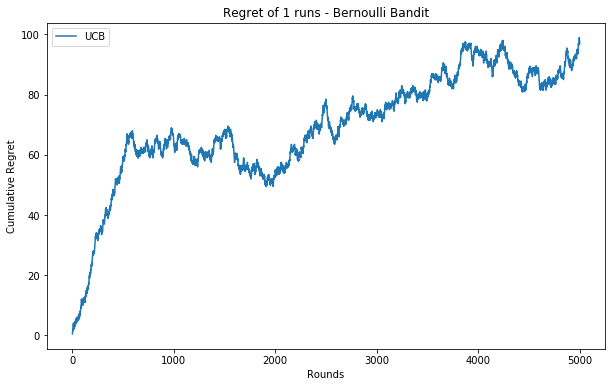

In [22]:
T = 5000
runs = 1
rew1, draws1 = TS_adaptation(T, MAB1, print_info=True)
reg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
x = np.arange(1, T+1)

plt.figure(figsize=(10,6))
plt.plot(x, reg1, label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title("Regret of {} runs - Bernoulli Bandit".format(runs))

plt.savefig('Q1')
plt.show()

In [15]:
for i in range(100):
    print(np.random.binomial(1,0.8))

1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
